In [1]:
import torch
torch.manual_seed(10)

from model import Model
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
from torch.profiler import profile, record_function, ProfilerActivity

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Model(device=device)

path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'

noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
# noisy_imgs_1 = noisy_imgs_1#[:10000]
# noisy_imgs_2 = noisy_imgs_2#[:10000]

noisy_imgs , clean_imgs = torch.load(path_val)
# noisy_imgs = noisy_imgs.float()/256
# clean_imgs = clean_imgs.float()/256


/idiap/temp/sshetty/miniconda/envs/pyml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ss1_ol78 because the default path (/idiap/home/sshetty/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
model.train(noisy_imgs_1, noisy_imgs_2, 1000)
out = model.predict(noisy_imgs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:18<00:00,  5.04it/s]


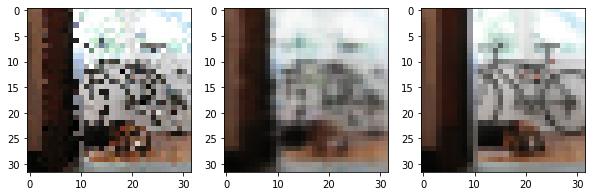

In [3]:
transform = T.ToPILImage()
k = 80
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(1, 3,2)
plt.imshow(transform(out[k]/256));
plt.subplot(1, 3,3)
plt.imshow(transform(clean_imgs[k]));

In [4]:
out.shape

torch.Size([1000, 3, 32, 32])

In [5]:
def psnr(denoised, ground_truth):
    mse = torch.mean(torch.mean((denoised-ground_truth)**2,dim=(1,2,3)))
    return -10 * torch.log10(mse + 10**(-8))

psnr(out.cpu().float()/256, clean_imgs.float()/256)

tensor(23.6661)

In [6]:
def compute_psnr(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3))).mean()
compute_psnr(out.cpu().float()/256, clean_imgs.float()/256)

tensor(24.4623)

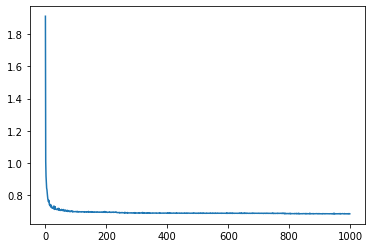

In [7]:
import matplotlib.pyplot as plt
plt.plot(model.loss_train.detach().cpu())

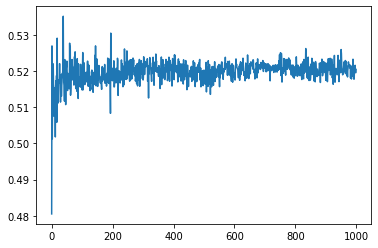

In [8]:
plt.plot(model.loss_valid.detach().cpu())